In [43]:
# !pip install scikit-image==0.18.1 --user

  Using cached scikit_image-0.18.1-cp37-cp37m-win_amd64.whl (12.1 MB)
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.17.1
    Uninstalling scikit-image-0.17.1:
      Successfully uninstalled scikit-image-0.17.1


In [2]:
from pyTFM.TFM_functions import calculate_deformation
from pyTFM.plotting import show_quiver
from pyTFM.frame_shift_correction import correct_stage_drift
from PIL import Image
import numpy as np
import os
#The deprecated skimage.feature.register_translation function has been removed (use skimage.registration.phase_cross_correlation instead). in scikit 0.19

In [3]:
path = "data/col_anil1h/"
dir_list = os.listdir(path)

In [7]:
print(path+dir_list[0])
imageBase=np.asarray(Image.open(path+dir_list[0]))

for i in range(1,len(dir_list)-1):
    imageR = np.asarray(Image.open(path+dir_list[i]))
    image1_cor, image2_cor, other_images, drift = correct_stage_drift(imageBase, imageR, additional_images=[])
    
    # saving the output
    image1_cor.save(r"data/"+dir_list[0])
    image2_cor.save(r"data/"+dir_list[i])

data/col_anil1h/Collagen_anillin_1h-0000.tif


In [8]:
path = "data/"
dir_list = os.listdir(path)

data/Collagen_anillin_1h-0000.tif


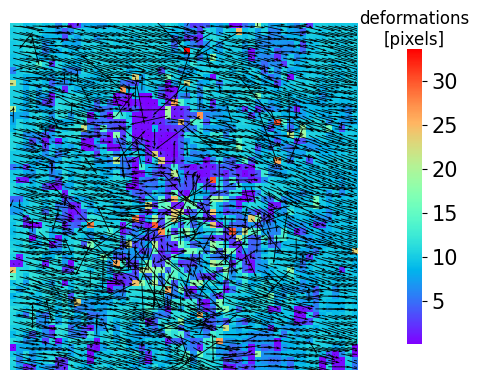

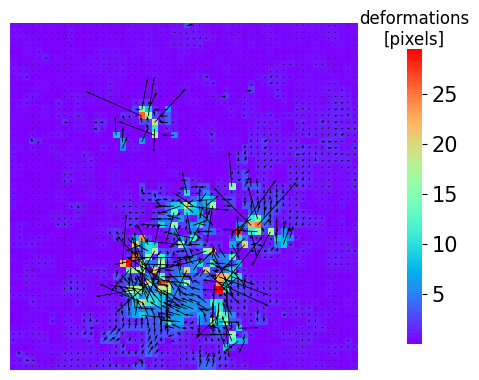

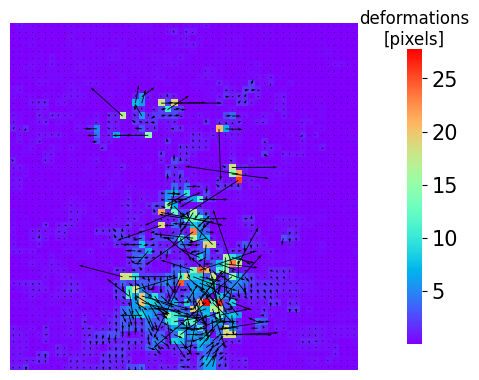

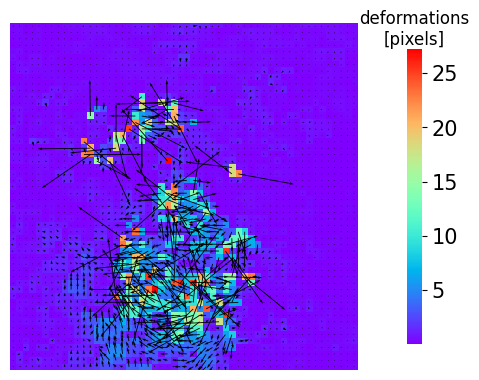

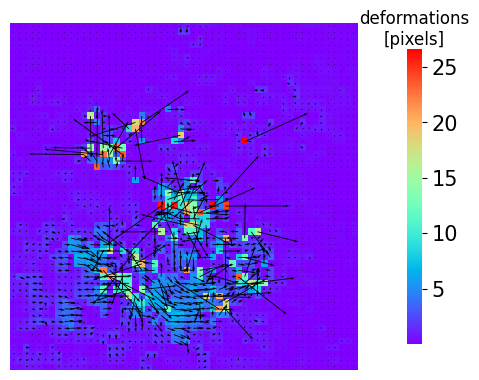

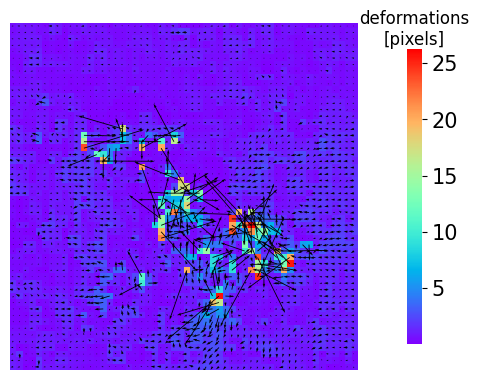

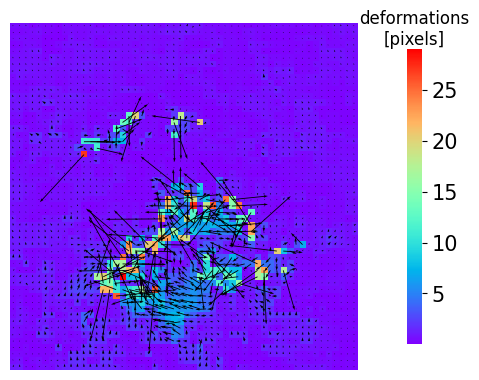

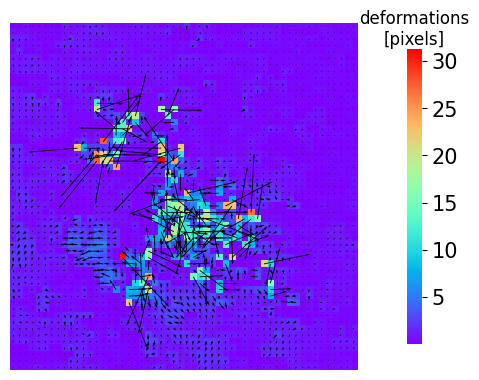

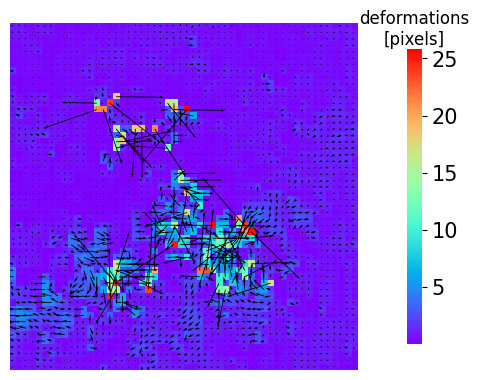

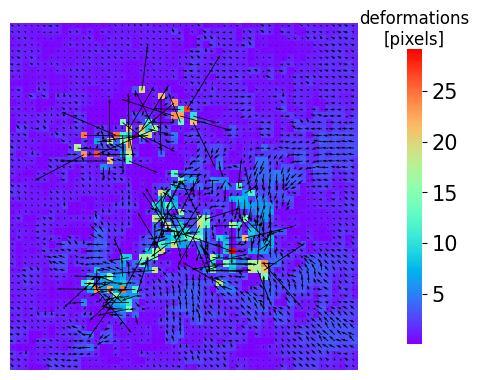

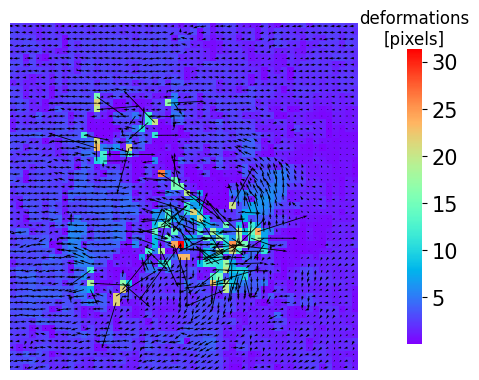

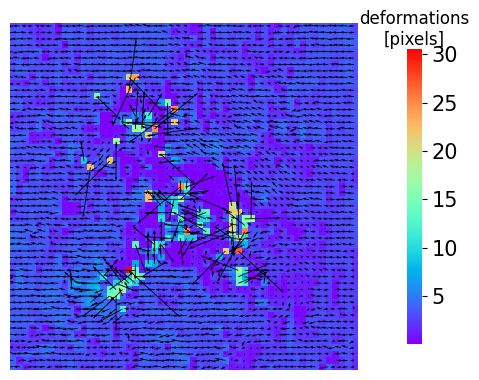

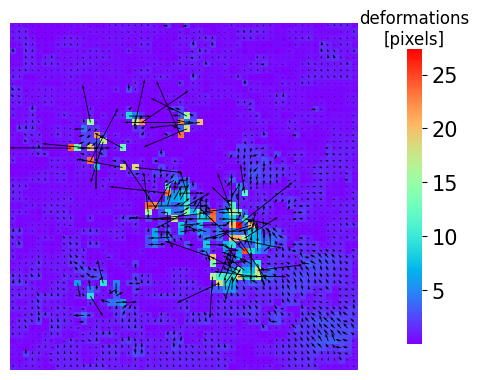

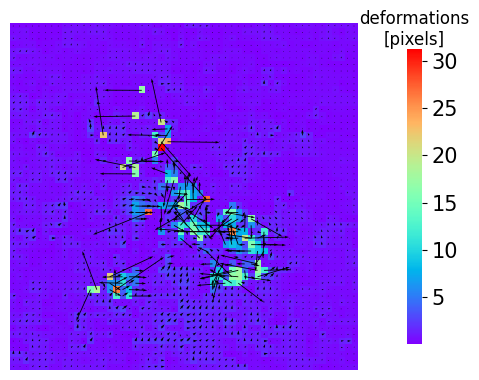

In [10]:
print(path+dir_list[0])
imageBase=np.asarray(Image.open(path+dir_list[0]))
for i in range(1,len(dir_list)-1):
    # paths to the images
    im_path1 = path+dir_list[i-1] # change to your location
    im_path2 = path+dir_list[i]
    u, v, mask_val, mask_std = calculate_deformation(im_path1, im_path2, window_size = 30, overlap = 15)
    
    # plotting the deformation field
    fig1, ax = show_quiver(u, v, cbar_str="deformations\n[pixels]")

## Calculating Traction Fields

In [11]:
from pyTFM.TFM_functions import TFM_tractions
import numpy as np

In [15]:
print(imageBase.shape)

(837, 828)


In [16]:
ps1 = 0.201 # pixel size of the image of the beads
im1_shape = imageBase.shape # dimensions of the image of the beads
ps2 = ps1 * np.mean(np.array(im1_shape) / np.array(u.shape)) # pixel size of of the deformation field
young = 49000 # Young's modulus of the substrate in Pa
sigma = 0.49 # Poisson's ratio of the substrate
h = 300 # height of the substrate in µm, "infinite" is also accepted

In [17]:
tx, ty = TFM_tractions(u, v, pixelsize1=ps1, pixelsize2=ps2, h=h, young=young, sigma=sigma)

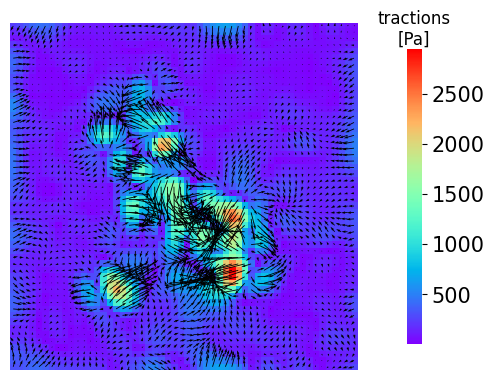

In [18]:
fig2, ax = show_quiver(tx, ty, cbar_str="tractions\n[Pa]")

## Quantifying the Force Generation